In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('advertising.csv')

# Split the dataset into dependent and independent variables
X = df[['TV', 'Radio']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(model.score(X_test, y_test))

0.8901010295167994


In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

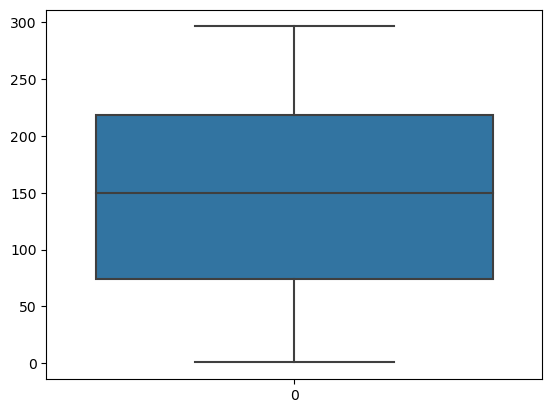

In [9]:
#outlier analysis
plt1=sns.boxplot(df['TV'])
plt.show()

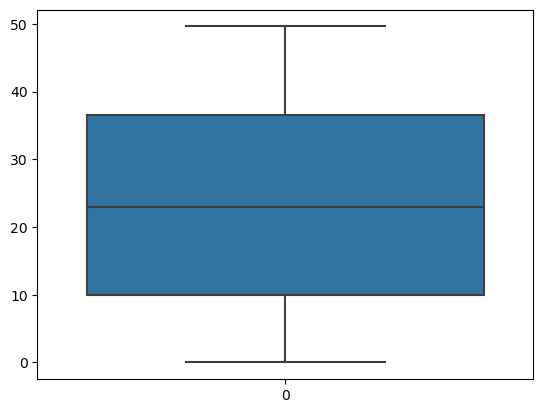

In [10]:
plt1=sns.boxplot(df['Radio'])
plt.show()

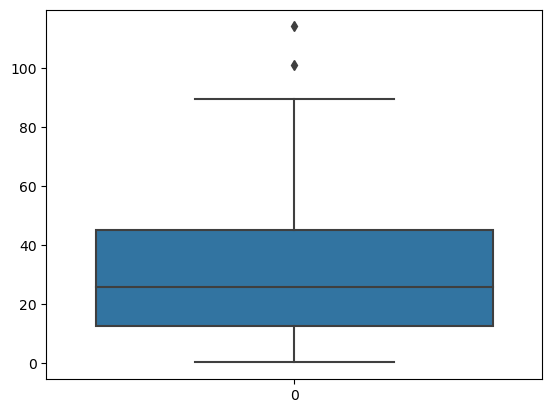

In [11]:
plt1=sns.boxplot(df['Newspaper'])
plt.show()

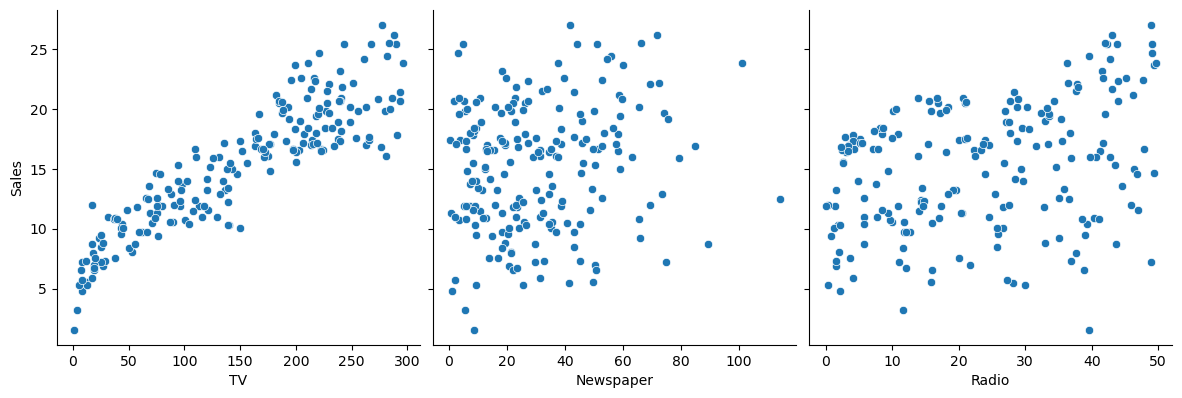

In [12]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

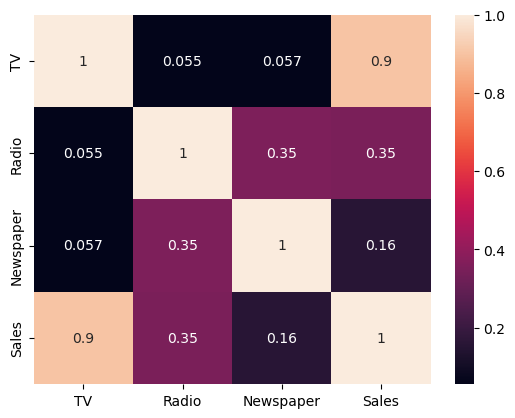

In [13]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
x=df.drop('Sales',axis=1)
y=df[['Sales']]

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)

In [17]:
m1=LinearRegression()


In [18]:
m1.fit(xtrain,ytrain)

LinearRegression()

In [19]:
m1.score(xtrain,ytrain)

0.905486333977187

In [20]:
m1.score(xtest,ytest)

0.8747226291661847

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
m2=DecisionTreeRegressor()

In [23]:
m2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [24]:
m2.score(xtrain,ytrain)

1.0

In [25]:
m2.score(xtest,ytest)

0.9000103668398914

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
m3=RandomForestRegressor()

In [28]:
m3.fit(xtrain,ytrain)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [29]:
m3.score(xtrain,ytrain)

0.9916211532762038

In [30]:
m3.score(xtest,ytest)

0.9503468133666588

In [31]:
m1.predict(np.array([2345,3456,5678]).reshape(1,-1))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[484.9442887]])

In [32]:
from tkinter import *
import joblib
from tkinter import messagebox

In [33]:
joblib.dump(m1,"advertising")
model=joblib.load("advertising")

In [ ]:
def btn():
    e1=float(e11.get())
    e2=float(e22.get())
    e3=float(e33.get())
    arr=np.array([e1,e2,e3])
    x=model.predict(arr.reshape(1,-1))
    xim = "Amount of Sales predicted is : " + str(x[0][0])
    labelx.config(text=xim)
    
m=Tk()
m.configure(bg="violet")
m.title("Titanic Survival Prediction")
m.geometry("750x400")
m.minsize(750,400)
m.maxsize(750,400)

label1=Label(m,text="Enter Amount Spent on Television",bg="violet",fg="black",font=("Arial",15,"bold"))
label1.grid(row=1,column=0,pady=10,padx=50)
e11=Entry(m,width=20,font=("Arial",14),bg="pink",fg="black",borderwidth=2)
e11.grid(row=1,column=1,pady=10,padx=5)

label2=Label(m,text="Enter Amount Spent on Radio",bg="violet",fg="black",font=("Arial",15,"bold"))
label2.grid(row=2,column=0,pady=10,padx=50)
e22=Entry(m,width=20,font=("Arial",14),bg="pink",fg="black",borderwidth=2)
e22.grid(row=2,column=1,pady=10,padx=5)

label3=Label(m,text="Enter Amount Spent on Newspapers",bg="violet",fg="black",font=("Arial",15,"bold"))
label3.grid(row=3,column=0,pady=10,padx=50)
e33=Entry(m,width=20,font=("Arial",14),bg="pink",fg="black",borderwidth=2)
e33.grid(row=3,column=1,pady=10,padx=5)

labelx=Label(m,text="",bg="violet",fg="black",font=("Arial",15,"bold"))
labelx.grid(row=5,column=0,pady=10,padx=50)

btn=Button(text="Submit",bg="lightgreen",activebackground="pink",borderwidth=2,font=("Arial",15,"bold"),command=btn)
btn.grid(row=7,column=0,columnspan=2,padx=340,pady=10)
m.mainloop()
    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
